In [1]:
# import the necessarry libraries 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# read the image 
img = cv2.imread('Image/baby.jpg')
#convert img to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
# reshape the image to a 2D array of pixels and 3 color values RGB
# if your image (50, 50, 3) in the beginning will be converted to (50*50, 3)
pixel_values = img.reshape((-1, 3))
# convert to float 
pixel_values = np.float32(pixel_values)

In [4]:
# define stopping criteria (needed for avoiding too much computation)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, 0.2)

In [5]:
# number of clusters (k)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [6]:
# convert back to 8 bit values 
centers = np.uint8(centers)
#flatten the labels array 
labels = labels.flatten()

In [7]:
# convert all pixels to the color of the centroids
segmented_img = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_img = segmented_img.reshape(img.shape)

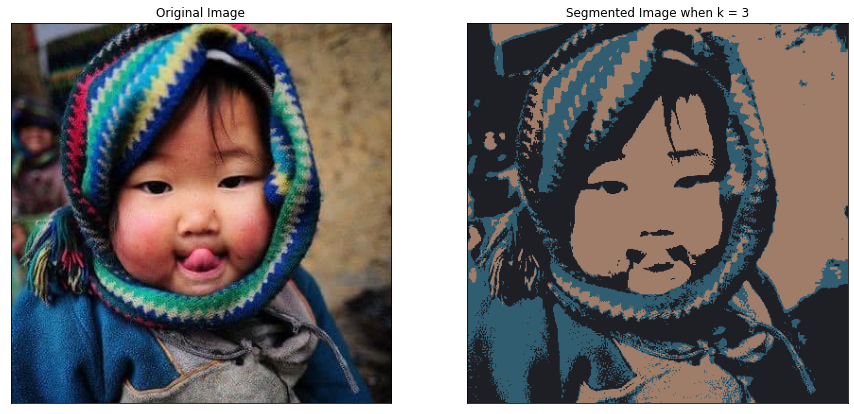

In [8]:
# display the original and segmented image when k = 3
figure_size = 15
plt.figure(figsize=(figure_size, figure_size))
plt.subplot(1, 2, 1), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(segmented_img)
plt.title('Segmented Image when k = %i' % k), plt.xticks([])
plt.yticks([])
plt.show()